| Variable Name                  | Role   | Type        | Demographic                                        | Description                                                                                   | Units | Missing Values |
|--------------------------------|--------|-------------|----------------------------------------------------|-----------------------------------------------------------------------------------------------|-------|----------------|
| Gender                         | Feature| Categorical | Gender                                             |                                                                                               |       | no             |
| Age                            | Feature| Continuous  | Age                                                |                                                                                               |       | no             |
| Height                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| Weight                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| family_history_with_overweight| Feature| Binary      |                                                    | Has a family member suffered or suffers from overweight?                                      |       | no             |
| FAVC                           | Feature| Binary      |                                                    | Do you eat high caloric food frequently?                                                      |       | no             |
| FCVC                           | Feature| Integer     |                                                    | Do you usually eat vegetables in your meals?                                                  |       | no             |
| NCP                            | Feature| Continuous  |                                                    | How many main meals do you have daily?                                                        |       | no             |
| CAEC                           | Feature| Categorical |                                                    | Do you eat any food between meals?                                                            |       | no             |
| SMOKE                          | Feature| Binary      |                                                    | Do you smoke?                                                                                 |       | no             |
| CH2O                           | Feature| Continuous  |                                                    | How much water do you drink daily?                                                           |       | no             |
| SCC                            | Feature| Binary      |                                                    | Do you monitor the calories you eat daily?                                                    |       | no             |
| FAF                            | Feature| Continuous  |                                                    | How often do you have physical activity?                                                     |       | no             |
| TUE                            | Feature| Integer     |                                                    | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |       | no             |
| CALC                           | Feature| Categorical |                                                    | How often do you drink alcohol?                                                              |       | no             |
| MTRANS                         | Feature| Categorical |                                                    | Which transportation do you usually use?                                                      |       | no             |
| NObeyesdad                     | Target | Categorical |                                                    | Obesity level                                                                                |       | no             |


In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import joblib

In [77]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [78]:
unique_values_counts = df['NObeyesdad'].value_counts()
unique_values_counts

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [79]:
# df.drop(['Height', 'Weight'], axis=1, inplace=True)

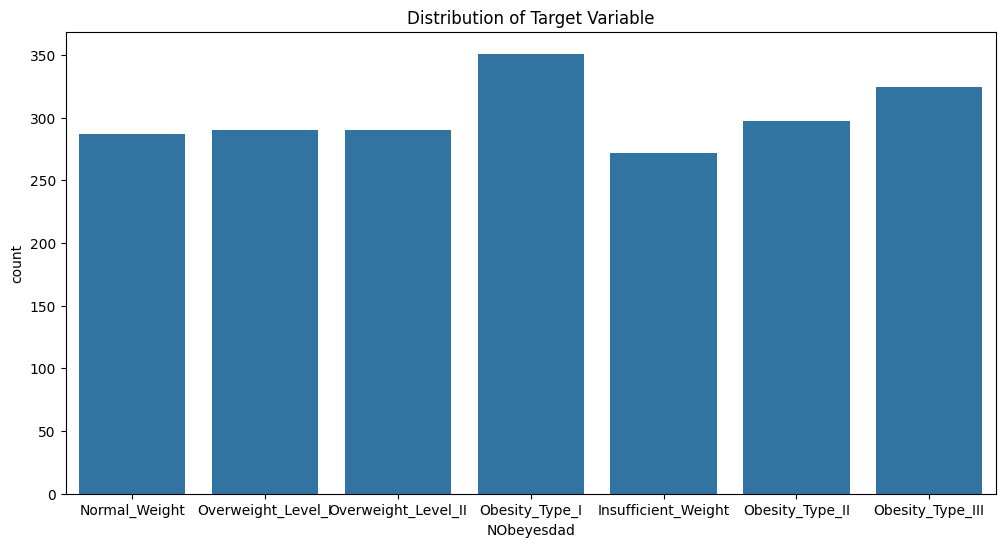

In [80]:

plt.figure(figsize=(12, 6))
sns.countplot(x="NObeyesdad", data=df)
plt.title("Distribution of Target Variable")
plt.show()

In [81]:
cat_features = df.select_dtypes(include = ['object'])
cat_features.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [82]:
cat_features

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [83]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [84]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [85]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : [0 1]
family_history_with_overweight : [1 0]
FAVC : [0 1]
CAEC : [2 1 0 3]
SMOKE : [0 1]
SCC : [0 1]
CALC : [3 2 1 0]
MTRANS : [3 4 0 2 1]
NObeyesdad : [1 5 6 2 0 3 4]


<Axes: >

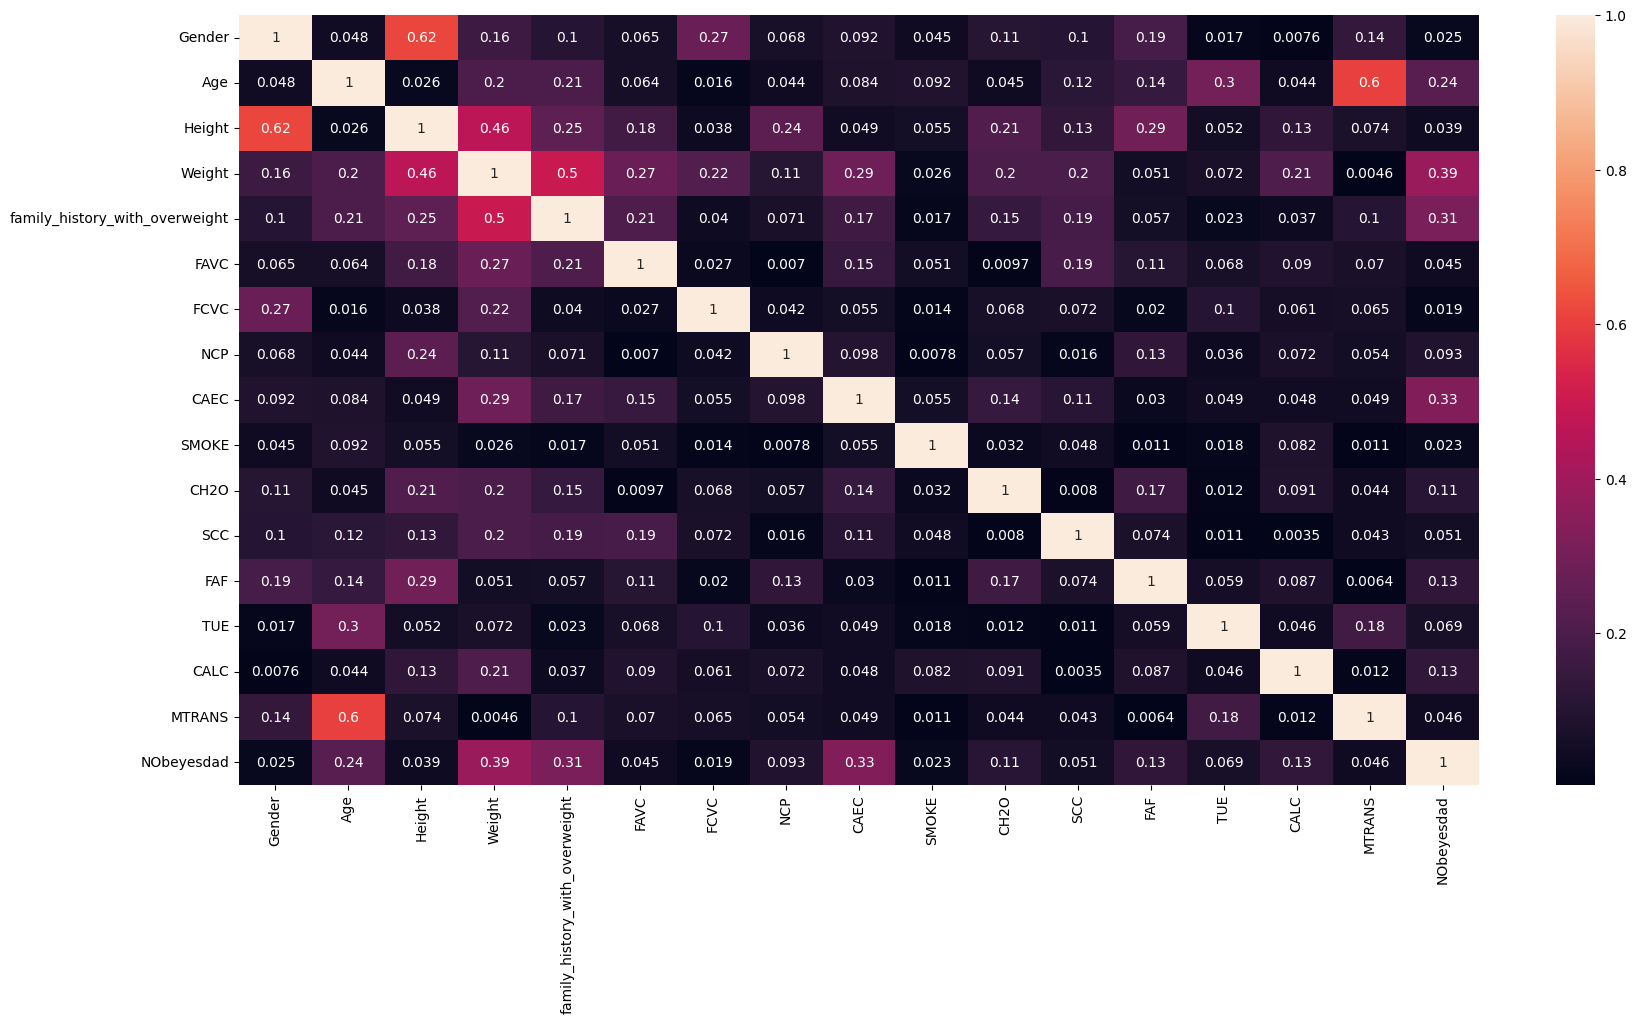

In [86]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [87]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [88]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

# RandomForestClassifier

In [89]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

RFclassifier = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RFclassifier.fit(X_train_scaled, y_train)

y_pred = RFclassifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9692671394799054


In [90]:
# Save the trained model to a file
joblib.dump(RFclassifier, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

In [91]:
y_pred = RFclassifier.predict([[1.        , 0.17021277, 0.43754268, 0.12622076, 1.        ,
       1.        , 0.5       , 0.66666667, 0.66666667, 0.        ,
       0.5       , 0.        , 0.        , 1.        , 0.66666667,
       0.        ]])

y_pred

array([1])

# ANN

In [92]:
cv_scores_train = []
cv_scores_test = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model_ANN = Sequential()
    model_ANN.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model_ANN.add(Dense(64, activation='relu'))
    model_ANN.add(Dense(7, activation='softmax'))

    model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_ANN.fit(X_train_scaled, y_train, epochs=40, batch_size=45, verbose=0)

    train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
    test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

    cv_scores_train.append(train_score)
    cv_scores_test.append(test_score)

mean_cv_score_train = np.mean(cv_scores_train)
print(f"Mean Cross-Validation Training Accuracy: {mean_cv_score_train}")
mean_cv_score_test = np.mean(cv_scores_test)
print(f"Mean Cross-Validation Testing Accuracy: {mean_cv_score_test}")


/home/surajprajapati/Documents/Hackthonpring24/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/surajprajapati/Documents/Hackthonpring24/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/surajprajapati/Documents/Hackthonpring24/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. Wh

Mean Cross-Validation Training Accuracy: 0.9991113841533661
Mean Cross-Validation Testing Accuracy: 0.9385342836380005


In [93]:
cv_scores_train

[0.9994075894355774,
 0.9982227683067322,
 1.0,
 0.9988151788711548,
 0.9988151788711548,
 0.9994075894355774,
 0.9988151788711548,
 0.9994075894355774,
 1.0,
 0.9982227683067322]

In [94]:
cv_scores_test

[0.9479905366897583,
 0.9456264972686768,
 0.9290780425071716,
 0.9385342597961426,
 0.9527186751365662,
 0.9598108530044556,
 0.9290780425071716,
 0.9503546357154846,
 0.9172576665878296,
 0.914893627166748]

# LogisticRegression

In [95]:
cv_scores_train = []
cv_scores_test = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000, penalty="l2", solver="saga")
    scaler = StandardScaler()
    
    model.fit(X_train_scaled, y_train)

    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    cv_scores_train.append(train_score)
    cv_scores_test.append(test_score)

mean_cv_score = np.mean(cv_scores_train)
print(f"Mean Cross-Validation Training Accuracy: {mean_cv_score}")

mean_cv_score = np.mean(cv_scores_test)
print(f"Mean Cross-Validation Testing Accuracy: {mean_cv_score}")

Mean Cross-Validation Training Accuracy: 0.9002369668246446
Mean Cross-Validation Testing Accuracy: 0.8739952718676124


In [96]:
print(cv_scores_train)
print(cv_scores_test)

[0.8998815165876777, 0.8975118483412322, 0.8981042654028436, 0.9040284360189573, 0.9022511848341233, 0.8963270142180095, 0.9004739336492891, 0.8998815165876777, 0.9046208530805687, 0.8992890995260664]
[0.8628841607565012, 0.8628841607565012, 0.8723404255319149, 0.8605200945626478, 0.8770685579196218, 0.8817966903073287, 0.8652482269503546, 0.8888888888888888, 0.8888888888888888, 0.8794326241134752]
